<a href="https://colab.research.google.com/github/OdysseusPolymetis/channels_digital_scholarship_2024/blob/main/oxford_june_6th_withTfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/PerseusDL/canonical-greekLit.git

Cloning into 'canonical-greekLit'...
remote: Enumerating objects: 64075, done.
remote: Counting objects: 100% (781/781), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 64075 (delta 508), reused 762 (delta 508), pack-reused 63294
Receiving objects: 100% (64075/64075), 566.40 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (42372/42372), done.
Updating files: 100% (2641/2641), done.


In [ ]:
!git clone https://github.com/PerseusDL/canonical-latinLit.git

Cloning into 'canonical-latinLit'...
remote: Enumerating objects: 25818, done.
remote: Counting objects: 100% (1056/1056), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 25818 (delta 572), reused 1024 (delta 550), pack-reused 24762
Receiving objects: 100% (25818/25818), 303.95 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (16235/16235), done.


In [ ]:
!git clone https://github.com/OpenGreekAndLatin/First1KGreek.git

Cloning into 'First1KGreek'...
remote: Enumerating objects: 59018, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 59018 (delta 76), reused 165 (delta 66), pack-reused 58838
Receiving objects: 100% (59018/59018), 874.59 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (35920/35920), done.
Updating files: 100% (3141/3141), done.


In [ ]:
!wget https://raw.githubusercontent.com/aurelberra/stopwords/master/stopwords_greek.txt
!wget https://raw.githubusercontent.com/aurelberra/stopwords/master/stopwords_latin.txt

--2024-06-04 08:01:11--  https://raw.githubusercontent.com/aurelberra/stopwords/master/stopwords_greek.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91773 (90K) [text/plain]
Saving to: ‘stopwords_greek.txt’

stopwords_greek.txt 100%[===================>]  89.62K  --.-KB/s    in 0.002s  

2024-06-04 08:01:11 (42.6 MB/s) - ‘stopwords_greek.txt’ saved [91773/91773]

--2024-06-04 08:01:11--  https://raw.githubusercontent.com/aurelberra/stopwords/master/stopwords_latin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32022 (31

In [ ]:
!pip install cltk sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 695.7/695.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 44.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2

In [ ]:
import os
import re
import pickle
import unicodedata
from collections import defaultdict
from lxml import etree
from tqdm import tqdm
import numpy as np
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from cltk.sentence.lat import LatinPunktSentenceTokenizer
from cltk.sentence.grc import GreekRegexSentenceTokenizer
from cltk.data.fetch import FetchCorpus

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
model = SentenceTransformer("bowphs/SPhilBerta")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.43M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/994k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [ ]:
def read_stopwords(file_path):
    with open(file_path, 'r') as file:
        stopwords = file.read().splitlines()
    return stopwords

In [ ]:
def normalize_text(text):
    text = unicodedata.normalize('NFD', text)
    text = ''.join([char for char in text if unicodedata.category(char) != 'Mn'])
    return text.lower()

In [ ]:
def normalize_stopwords(stopwords):
    return set(normalize_text(word) for word in stopwords)

In [ ]:
greek_stopwords = read_stopwords('/content/stopwords_greek.txt')
latin_stopwords = read_stopwords('/content/stopwords_latin.txt')
normalized_greek_stopwords = normalize_stopwords(greek_stopwords)
normalized_latin_stopwords = normalize_stopwords(latin_stopwords)

In [ ]:
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

Version à tester demain

In [ ]:
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [
        word for word in words
        if ''.join([char for char in unicodedata.normalize('NFD', word) if unicodedata.category(char) != 'Mn']).lower()
        not in stopwords
    ]
    return ' '.join(filtered_words)

In [ ]:
corpus_downloader = FetchCorpus(language='lat')
corpus_downloader.import_corpus('lat_models_cltk')
corpus_downloader = FetchCorpus(language='grc')
corpus_downloader.import_corpus('grc_models_cltk')

INFO:CLTK:Cloning 'lat_models_cltk' from 'https://github.com/cltk/lat_models_cltk.git'


INFO:CLTK:Cloning 'grc_models_cltk' from 'https://github.com/cltk/grc_models_cltk.git'


In [ ]:
def clean_text(text):
    # Supprimer le contenu entre crochets
    text = re.sub(r'\[.*?\]', '', text)
    # Supprimer les références abrégées (par exemple, adv., math., etc.)
    text = re.sub(r'\b(?:adv|math|vgl|phil|of|vol|p)\.\b', '', text, flags=re.IGNORECASE)
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    # Supprimer les ponctuations non pertinentes (conserver .,;:!?)
    text = re.sub(r'[^\w\s.,;:!?]', '', text)
    # Remplacer les suites d'espaces par un seul espace
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
def extract_sentences_from_descendants(element, nsmap, file_path, stopwords):
    sentences = []

    # Sélection du tokenizer en fonction de la langue
    if 'lat' in file_path:
        sentence_tokenizer = LatinPunktSentenceTokenizer()
    elif 'grc' in file_path:
        sentence_tokenizer = GreekRegexSentenceTokenizer()
    else:
        raise ValueError("Langue non supportée.")

    for descendant in element.iterdescendants():
        if isinstance(descendant.tag, str):
            tag_without_ns = descendant.tag.split('}')[-1]
            if tag_without_ns in ['l', 'p', 'div']:
                child_text = ''.join(descendant.itertext()).strip()
                if child_text:
                    # Debug: Afficher les premières phrases extraites
                    #print(f"Phrase extraite: {child_text[:50]}...")  # Limité à 50 caractères pour éviter un trop long affichage

                    # Nettoyer et normaliser le texte
                    cleaned_text = clean_text(child_text)
                    normalized_text = normalize_text(cleaned_text)

                    filtered_text = remove_stopwords(normalized_text, stopwords)

                    # Tokenisation
                    child_sentences = sentence_tokenizer.tokenize(filtered_text)

                    # Filtrer les phrases vides et trop courtes (minimum 15 caractères, espaces exclus)
                    filtered_sentences = [sentence for sentence in child_sentences if len(sentence.replace(' ', '')) >= 15]

                    sentences.extend(filtered_sentences)
    return sentences

Version à tester demain :

In [ ]:
def extract_sentences_from_descendants(element, nsmap, file_path, stopwords):
    sentences = []
    if 'lat' in file_path:
        sentence_tokenizer = LatinPunktSentenceTokenizer()
    elif 'grc' in file_path:
        sentence_tokenizer = GreekRegexSentenceTokenizer()
    else:
        raise ValueError("Langue non supportée.")

    for descendant in element.iterdescendants():
        if isinstance(descendant.tag, str):
            tag_without_ns = descendant.tag.split('}')[-1]
            if tag_without_ns in ['l', 'p', 'div']:
                child_text = ''.join(descendant.itertext()).strip()
                if child_text:
                    cleaned_text = clean_text(child_text)
                    filtered_text = remove_stopwords(cleaned_text, stopwords)
                    child_sentences = sentence_tokenizer.tokenize(filtered_text)
                    filtered_sentences = [sentence for sentence in child_sentences if len(sentence.replace(' ', '')) >= 15]
                    sentences.extend(filtered_sentences)
    return sentences

In [ ]:
def extract_body_content_from_xml(file_path, stopwords):
    parser = etree.XMLParser(recover=True)
    tree = etree.parse(file_path, parser)
    nsmap = tree.getroot().nsmap
    default_ns = nsmap.get(None)

    if default_ns:
        body = tree.find(".//{{{}}}body".format(default_ns))
    else:
        body = tree.find(".//body")

    if body is None:
        raise ValueError(f"No <body> element found in {file_path}")

    return extract_sentences_from_descendants(body, nsmap, file_path, stopwords)

In [ ]:
def extract_texts_from_directory(directory_path, target_authors, stopwords):
    texts = {}
    for root, _, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith('.xml') and ('lat' in file or 'grc' in file) and any(author in file for author in target_authors):
                content = extract_body_content_from_xml(file_path, stopwords)
                texts[file] = content
    return texts


In [ ]:
def add_missing_authors_to_corpus(main_corpus, backup_directory, target_authors, stopwords):
    # Extraire les auteurs présents dans le corpus principal
    authors_present = set([file_id.split('.')[0] for file_id in main_corpus.keys()])
    target_authors_set = set(target_authors)

    # Identifier les auteurs manquants
    authors_missing = target_authors_set - authors_present

    if not authors_missing:
        print("Tous les auteurs cibles sont déjà présents dans le corpus principal.")
        return main_corpus

    print(f"Auteurs manquants: {sorted(authors_missing)}")

    # Extraire les textes des auteurs manquants depuis le répertoire de secours
    missing_authors_corpus = extract_texts_from_directory(backup_directory, authors_missing, stopwords)

    # Ajouter les textes manquants au corpus principal
    main_corpus.update(missing_authors_corpus)

    return main_corpus

In [ ]:
grc_target_authors = ["tlg0059", "tlg0086", "tlg1325", "tlg0626", "tlg1304", "tlg0591", "tlg0593", "tlg1562", "tlg0014", "tlg0610", "tlg0557"]
lat_target_authors = ["phi0474", "phi1017", "stoa0255", "phi1014", "phi0550", "tlg0628", "tlg0562", "phi1254", "phi1002", "stoa0058", "phi0684", "phi1212"]

In [ ]:
greek_corpus = extract_texts_from_directory('/content/canonical-greekLit', grc_target_authors, normalized_greek_stopwords)
greek_corpus = add_missing_authors_to_corpus(greek_corpus, '/content/First1KGreek', grc_target_authors, normalized_greek_stopwords)
latin_corpus = extract_texts_from_directory('/content/canonical-latinLit', lat_target_authors, normalized_latin_stopwords)

Auteurs manquants: ['tlg0591', 'tlg0593', 'tlg0610', 'tlg0626', 'tlg1304', 'tlg1325', 'tlg1562']


In [ ]:
def extract_all_texts_from_directory(directory_path, stopwords):
    texts = {}
    files = [os.path.join(root, file) for root, _, files in os.walk(directory_path) for file in files if file.endswith('.xml') and ('lat' in file or 'grc' in file)]
    for file_path in tqdm(files, desc="Extraction des textes"):
        content = extract_body_content_from_xml(file_path, stopwords)
        texts[os.path.basename(file_path)] = content
    return texts

In [ ]:
all_greek_texts = extract_all_texts_from_directory('/content/canonical-greekLit', normalized_greek_stopwords)

Extraction des textes: 100%|██████████| 817/817 [02:44<00:00,  4.96it/s]


In [ ]:
print("Aperçu des auteurs dans all_greek_texts:")
for file_id, sentences in all_greek_texts.items():
    author = file_id.split('.')[0]
    print(f"Auteur : {author}, Nombre de phrases : {len(sentences)}")

Aperçu des auteurs dans all_greek_texts:
Auteur : tlg0014, Nombre de phrases : 187
Auteur : tlg0014, Nombre de phrases : 167
Auteur : tlg0014, Nombre de phrases : 780
Auteur : tlg0014, Nombre de phrases : 437
Auteur : tlg0014, Nombre de phrases : 1632
Auteur : tlg0014, Nombre de phrases : 342
Auteur : tlg0014, Nombre de phrases : 473
Auteur : tlg0014, Nombre de phrases : 242
Auteur : tlg0014, Nombre de phrases : 379
Auteur : tlg0014, Nombre de phrases : 313
Auteur : tlg0014, Nombre de phrases : 272
Auteur : tlg0014, Nombre de phrases : 256
Auteur : tlg0014, Nombre de phrases : 601
Auteur : tlg0014, Nombre de phrases : 410
Auteur : tlg0014, Nombre de phrases : 496
Auteur : tlg0014, Nombre de phrases : 306
Auteur : tlg0014, Nombre de phrases : 749
Auteur : tlg0014, Nombre de phrases : 208
Auteur : tlg0014, Nombre de phrases : 117
Auteur : tlg0014, Nombre de phrases : 166
Auteur : tlg0014, Nombre de phrases : 181
Auteur : tlg0014, Nombre de phrases : 445
Auteur : tlg0014, Nombre de phrase

In [ ]:
# Extraire les auteurs présents dans les corpus grec et latin
greek_authors_present = set([file_id.split('.')[0] for file_id in greek_corpus.keys()])
latin_authors_present = set([file_id.split('.')[0] for file_id in latin_corpus.keys()])

# Convertir les listes cibles en ensembles pour une comparaison facile
grc_target_authors_set = set(grc_target_authors)
lat_target_authors_set = set(lat_target_authors)

# Trouver les auteurs manquants et présents
greek_authors_missing = grc_target_authors_set - greek_authors_present
latin_authors_missing = lat_target_authors_set - latin_authors_present

greek_authors_found = grc_target_authors_set & greek_authors_present
latin_authors_found = lat_target_authors_set & latin_authors_present

# Afficher les résultats
print(f"Auteurs grecs trouvés ({len(greek_authors_found)}): {sorted(greek_authors_found)}")
print(f"Auteurs grecs manquants ({len(greek_authors_missing)}): {sorted(greek_authors_missing)}")
print(f"Auteurs latins trouvés ({len(latin_authors_found)}): {sorted(latin_authors_found)}")
print(f"Auteurs latins manquants ({len(latin_authors_missing)}): {sorted(latin_authors_missing)}")

Auteurs grecs trouvés (11): ['tlg0014', 'tlg0059', 'tlg0086', 'tlg0557', 'tlg0591', 'tlg0593', 'tlg0610', 'tlg0626', 'tlg1304', 'tlg1325', 'tlg1562']
Auteurs grecs manquants (0): []
Auteurs latins trouvés (9): ['phi0474', 'phi0550', 'phi1002', 'phi1014', 'phi1017', 'phi1212', 'phi1254', 'stoa0058', 'stoa0255']
Auteurs latins manquants (3): ['phi0684', 'tlg0562', 'tlg0628']


In [ ]:
greek_sentences = [(sentence, file_id) for file_id, sentences in greek_corpus.items() for sentence in sentences if sentence.strip()]
latin_sentences = [(sentence, file_id) for file_id, sentences in latin_corpus.items() for sentence in sentences if sentence.strip()]

In [ ]:
print(f"Nombre de phrases grecques brut : {len(greek_sentences)}")
print(f"Nombre de phrases latines brut : {len(latin_sentences)}")

Nombre de phrases grecques brut : 175529
Nombre de phrases latines brut : 471166


In [ ]:
# Filtrage des doublons dans les phrases grecques et latines avant l'encodage
unique_greek_sentences = list(set(greek_sentences))
unique_latin_sentences = list(set(latin_sentences))

print(f"Nombre de phrases grecques uniques : {len(unique_greek_sentences)}")
print(f"Nombre de phrases latines uniques : {len(unique_latin_sentences)}")

Nombre de phrases grecques uniques : 50666
Nombre de phrases latines uniques : 135695


In [ ]:
for i, (text, file_id) in enumerate(unique_greek_sentences[:5]):
    print(f"Exemple {i+1} - File ID: {file_id}")
    print(f"Texte normalisé: {text[:500]}")  # Afficher les 500 premiers caractères du texte
    print("--------------------------------------------------")

Exemple 1 - File ID: tlg0014.tlg030.perseus-grc2.xml
Texte normalisé: ἔνεστι δήπουθεν, ἄνδρες δικασταί.
--------------------------------------------------
Exemple 2 - File ID: tlg0059.tlg010.perseus-grc2.xml
Texte normalisé: μανθάνομεν συμβαῖνον παροῦσι λόγοις;
--------------------------------------------------
Exemple 3 - File ID: tlg0086.tlg038.perseus-grc2.xml
Texte normalisé: φίλος φιλῶν ἀντιφιλούμενος οἴονται φίλοι οἰόμενοι ἀλλήλους.
--------------------------------------------------
Exemple 4 - File ID: tlg0086.tlg035.perseus-grc2.xml
Texte normalisé: μείζους ὑπαρχῆς προσόδων ὑπάρχειν εὐπορίας, μετέχουσι πολιτείας ὑπεροχὴν πλήθους, κοινωνοῦσι πολιτεύονται δύνασθαι σχολάζειν ἀπόρους, λαμβάνοντας μισθόν.
--------------------------------------------------
Exemple 5 - File ID: tlg0086.tlg035.perseus-grc2.xml
Texte normalisé: ἰδίους βίους νεωτερίζουσιν, δεῖ ἐμποιεῖν ἀρχήν ἐποψομένην ζῶντας ἀσυμφόρως πολιτείαν, δημοκρατίᾳ δημοκρατίαν, ὀλιγαρχίᾳ ὀλιγαρχίαν, ὁμοίως πολιτειῶν εὐημεροῦν πό

In [ ]:
greek_texts = [text for text, _ in unique_greek_sentences]
greek_file_ids = [file_id for _, file_id in unique_greek_sentences]

latin_texts = [text for text, _ in unique_latin_sentences]
latin_file_ids = [file_id for _, file_id in unique_latin_sentences]

In [ ]:
def calculate_tfidf(texts, file_ids, stopwords):
    author_texts = defaultdict(list)
    for text, file_id in zip(texts, file_ids):
        author = file_id.split('.')[0]
        author_texts[author].append(text)

    author_documents = [" ".join(texts) for texts in author_texts.values()]

    vectorizer = TfidfVectorizer(
        max_df=0.85,
        min_df=2,
        stop_words=list(stopwords),
        sublinear_tf=True,
        norm='l2',
        use_idf=True
    )

    tfidf_matrix = vectorizer.fit_transform(author_documents)
    feature_names = vectorizer.get_feature_names_out()

    author_tfidf = {}
    for author, text_list in author_texts.items():
        author_index = list(author_texts.keys()).index(author)
        tfidf_scores = tfidf_matrix[author_index].toarray().flatten()
        author_tfidf[author] = dict(zip(feature_names, tfidf_scores))

    return author_tfidf, vectorizer

In [ ]:
def calculate_tfidf_for_all(texts, stopwords):
    vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=3,
        stop_words=list(stopwords),
        sublinear_tf=True,
        norm='l2',
        use_idf=True
    )

    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()

    return tfidf_matrix, feature_names, vectorizer


In [ ]:
def is_specific_phrase(phrase, tfidf_scores, threshold):
    words = phrase.split()
    specific_words = [word for word in words if tfidf_scores.get(word, 0) > threshold]
    specific_ratio = len(specific_words) / len(words)
    return specific_ratio > 0.05

In [ ]:
def is_specific_phrase(phrase, author, all_greek_tfidf_matrix, all_greek_feature_names, author_indices, threshold):
    words = phrase.split()
    author_index = author_indices[author]
    tfidf_scores = all_greek_tfidf_matrix[author_index].toarray().flatten()
    tfidf_dict = dict(zip(all_greek_feature_names, tfidf_scores))
    specific_words = [word for word in words if tfidf_dict.get(word, 0) > threshold]
    specific_ratio = len(specific_words) / len(words)
    return specific_ratio > 0.05

In [ ]:
greek_tfidf, greek_vectorizer = calculate_tfidf(greek_texts, greek_file_ids, normalized_greek_stopwords)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['05', '2020', '6872', 'abbreviations', 'adjectives', 'adverbs', 'analysis', 'ancient', 'arabic', 'articles', 'aurelberra', 'aurelien', 'berra', 'by', 'cc', 'com', 'conjunctions', 'count', 'critical', 'dataset', 'for', 'github', 'grc', 'greek', 'homeric', 'https', 'iliad', 'interjections', 'items', 'language', 'latin', 'letters', 'nc', 'nouns', 'numerals', 'odyssey', 'particles', 'postpositions', 'prepositions', 'pronouns', 'rights', 'roman', 'sa', 'single', 'stopwords', 'symbols', 'textual', 'type', 'typographical', 'verbs', 'version'] not in stop_words.
  warnings.warn(


In [ ]:
all_greek_author_documents = [" ".join(sentences) for sentences in all_greek_texts.values()]

In [ ]:
author_indices = {author: idx for idx, author in enumerate(all_greek_texts.keys())}

In [ ]:
all_greek_tfidf_matrix, all_greek_feature_names, all_greek_vectorizer = calculate_tfidf_for_all(all_greek_author_documents, normalized_greek_stopwords)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['05', '2020', '6872', 'abbreviations', 'adjectives', 'adverbs', 'analysis', 'ancient', 'arabic', 'articles', 'aurelberra', 'aurelien', 'berra', 'by', 'cc', 'com', 'conjunctions', 'count', 'critical', 'dataset', 'for', 'github', 'grc', 'greek', 'homeric', 'https', 'iliad', 'interjections', 'items', 'language', 'latin', 'letters', 'nc', 'nouns', 'numerals', 'odyssey', 'particles', 'postpositions', 'prepositions', 'pronouns', 'rights', 'roman', 'sa', 'single', 'stopwords', 'symbols', 'textual', 'type', 'typographical', 'verbs', 'version'] not in stop_words.
  warnings.warn(


In [ ]:
all_greek_tfidf_scores = []
for scores in greek_tfidf.values():
    all_greek_tfidf_scores.extend(scores.values())
threshold_relative = 0.01 * max(all_greek_tfidf_scores)  # Utiliser 1% du score TF-IDF maximum comme seuil
print(f"Seuil TF-IDF relatif fixé à : {threshold_relative}")

Seuil TF-IDF relatif fixé à : 0.0018404411465428392


In [ ]:
all_greek_tfidf_scores = all_greek_tfidf_matrix.toarray().flatten()
threshold_relative = 0.05 * max(all_greek_tfidf_scores)  # Utiliser 1% du score TF-IDF maximum comme seuil
print(f"Seuil TF-IDF relatif fixé à : {threshold_relative}")

Seuil TF-IDF relatif fixé à : 0.01843185217346235


In [ ]:
chatfiltered_greek_phrases_with_file_id = [
    (phrase, file_id) for phrase, file_id in greek_sentences
    if is_specific_phrase(phrase, greek_tfidf[file_id.split('.')[0]], threshold_relative)
]

In [ ]:
author_counts = defaultdict(int)
for phrase, file_id in filtered_greek_phrases_with_file_id:
    author = file_id.split('.')[0]
    author_counts[author] += 1

print("Distribution des phrases grecques filtrées par auteur :")
for author, count in author_counts.items():
    print(f"Auteur : {author}, Nombre de phrases : {count}")

Distribution des phrases grecques filtrées par auteur :
Auteur : tlg0014, Nombre de phrases : 30533
Auteur : tlg0086, Nombre de phrases : 41720
Auteur : tlg0557, Nombre de phrases : 22467
Auteur : tlg0059, Nombre de phrases : 66263
Auteur : tlg0626, Nombre de phrases : 508
Auteur : tlg0593, Nombre de phrases : 460
Auteur : tlg1325, Nombre de phrases : 1515
Auteur : tlg0591, Nombre de phrases : 111
Auteur : tlg1304, Nombre de phrases : 1796
Auteur : tlg1562, Nombre de phrases : 321
Auteur : tlg0610, Nombre de phrases : 629


In [ ]:
latin_texts_with_file_id = list(zip(latin_sentences, latin_file_ids))

In [ ]:
def check_data_and_encode(model, texts_with_file_id, batch_size=1024):
    encoded_data = []
    for start_index in tqdm(range(0, len(texts_with_file_id), batch_size), desc="Encoding"):
        batch = texts_with_file_id[start_index:start_index + batch_size]
        batch_texts = [text for text, _ in batch]
        batch_file_ids = [file_id for _, file_id in batch]
        try:
            batch_embeddings = model.encode(batch_texts)
            for text, embedding, file_id in zip(batch_texts, batch_embeddings, batch_file_ids):
                encoded_data.append((text, embedding, file_id))
        except Exception as e:
            print(f"Erreur lors de l'encodage du lot de textes de l'indice {start_index} à {start_index + batch_size}\nErreur: {e}")
    return encoded_data

In [ ]:
def save_encoded_data(filename, data):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

In [ ]:
def load_encoded_data(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [ ]:
filtered_greek_encoded_data = check_data_and_encode(model, filtered_greek_phrases_with_file_id)
save_encoded_data('/content/filtered_greek_encoded_data.pkl', filtered_greek_encoded_data)

Encoding: 100%|██████████| 163/163 [01:34<00:00,  1.72it/s]


In [ ]:
latin_encoded_data = check_data_and_encode(model, latin_sentences)
save_encoded_data('/content/latin_encoded_data.pkl', latin_encoded_data)

Encoding: 100%|██████████| 461/461 [04:08<00:00,  1.86it/s]


In [ ]:
filtered_greek_encoded_data = load_encoded_data('/content/filtered_greek_encoded_data.pkl')
latin_encoded_data = load_encoded_data('/content/latin_encoded_data.pkl')

In [ ]:
author_counts = defaultdict(int)
for _, _, file_id in filtered_greek_encoded_data:
    author = file_id.split('.')[0]
    author_counts[author] += 1

print("Distribution des données encodées grecques par auteur :")
for author, count in author_counts.items():
    print(f"Auteur : {author}, Nombre de phrases : {count}")


Distribution des données encodées grecques par auteur :
Auteur : tlg0014, Nombre de phrases : 30533
Auteur : tlg0086, Nombre de phrases : 41720
Auteur : tlg0557, Nombre de phrases : 22467
Auteur : tlg0059, Nombre de phrases : 66263
Auteur : tlg0626, Nombre de phrases : 508
Auteur : tlg0593, Nombre de phrases : 460
Auteur : tlg1325, Nombre de phrases : 1515
Auteur : tlg0591, Nombre de phrases : 111
Auteur : tlg1304, Nombre de phrases : 1796
Auteur : tlg1562, Nombre de phrases : 321
Auteur : tlg0610, Nombre de phrases : 629


In [ ]:
def to_tensor(data):
    phrases, embeddings, file_ids = zip(*data)
    embeddings_tensor = torch.tensor(embeddings).float()
    if torch.cuda.is_available():
        embeddings_tensor = embeddings_tensor.cuda()
    return phrases, embeddings_tensor, file_ids

In [ ]:
filtered_greek_phrases, filtered_greek_embeddings_tensor, filtered_greek_file_ids = to_tensor(filtered_greek_encoded_data)
filtered_latin_phrases, filtered_latin_embeddings_tensor, filtered_latin_file_ids = to_tensor(latin_encoded_data)

<ipython-input-41-4999416b5513>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  embeddings_tensor = torch.tensor(embeddings).float()


In [ ]:
filtered_greek_embeddings_tensor = filtered_greek_embeddings_tensor.to(device)
filtered_latin_embeddings_tensor = filtered_latin_embeddings_tensor.to(device)

In [ ]:
from torch.nn.functional import cosine_similarity

latin_group_size = 15
greek_indices_list = []
latin_indices_list = []
similarity_scores_list = []

with torch.no_grad():
    for start_idx in tqdm(range(0, filtered_latin_embeddings_tensor.size(0), latin_group_size), desc="Group Progress"):
        end_idx = min(start_idx + latin_group_size, filtered_latin_embeddings_tensor.size(0))
        latin_group = filtered_latin_embeddings_tensor[start_idx:end_idx]

        # Calculer la matrice de similarité pour le groupe actuel
        similarity_matrix = cosine_similarity(filtered_greek_embeddings_tensor.unsqueeze(1), latin_group.unsqueeze(0), dim=2)

        # Appliquer le seuil de similarité
        high_similarity_indices = torch.where((similarity_matrix > 0.80) & (similarity_matrix < 0.96))

        # Transférer les indices vers la CPU pour un traitement ultérieur si nécessaire
        high_similarity_indices_cpu = [index.cpu() for index in high_similarity_indices]

        # Stocker les indices et les scores de similarité
        greek_indices_list.append(high_similarity_indices_cpu[0])
        latin_indices_list.append(high_similarity_indices_cpu[1] + start_idx)
        similarity_scores_list.append(similarity_matrix[high_similarity_indices])

Group Progress: 100%|██████████| 31412/31412 [22:10<00:00, 23.60it/s]


In [ ]:
greek_indices = torch.cat(greek_indices_list)
latin_indices = torch.cat(latin_indices_list)
similarity_scores = torch.cat(similarity_scores_list)

In [ ]:
greek_indices_np = greek_indices.cpu().numpy()
latin_indices_np = latin_indices.cpu().numpy()
similarity_scores_np = similarity_scores.cpu().numpy()

In [ ]:
filtered_indices = [
    idx for idx in tqdm(range(len(similarity_scores_np)), desc="Filtrage des indices")
    if len(filtered_greek_phrases[greek_indices_np[idx]].split()) > 5 and
    len(filtered_latin_phrases[latin_indices_np[idx]].split()) > 5 and
    similarity_scores_np[idx] < 1
]

Filtrage des indices: 100%|██████████| 65637902/65637902 [01:33<00:00, 702928.43it/s]


In [ ]:
author_counts = defaultdict(int)
for idx in filtered_indices:
    g_idx = greek_indices_np[idx]
    author = filtered_greek_file_ids[g_idx].split('.')[0]
    author_counts[author] += 1

print("Distribution des similarités filtrées par auteur grec :")
for author, count in author_counts.items():
    print(f"Auteur : {author}, Nombre de similarités : {count}")

Distribution des similarités filtrées par auteur grec :
Auteur : tlg0014, Nombre de similarités : 1251200
Auteur : tlg0086, Nombre de similarités : 1669362
Auteur : tlg0557, Nombre de similarités : 824366
Auteur : tlg0059, Nombre de similarités : 3359990
Auteur : tlg1562, Nombre de similarités : 15828
Auteur : tlg0626, Nombre de similarités : 14775
Auteur : tlg1304, Nombre de similarités : 56673
Auteur : tlg0610, Nombre de similarités : 23685
Auteur : tlg1325, Nombre de similarités : 38615
Auteur : tlg0593, Nombre de similarités : 13377
Auteur : tlg0591, Nombre de similarités : 3633


In [ ]:
from collections import defaultdict
from math import log

file_pair_similarities = defaultdict(list)

# Accumulation des similarités
for idx in tqdm(filtered_indices, desc="Accumulation des similarités"):
    g_idx, l_idx = greek_indices_np[idx], latin_indices_np[idx]
    file_pair_key = (filtered_greek_file_ids[g_idx], filtered_latin_file_ids[l_idx])
    file_pair_similarities[file_pair_key].append(similarity_scores_np[idx])

# Calculer la moyenne de similarité pour chaque paire de fichiers
file_pair_metrics = {
    file_pair: (sum(similarities) / len(similarities)) * log(len(similarities))
    for file_pair, similarities in tqdm(file_pair_similarities.items(), desc="Calcul des métriques composites")
}
sorted_file_pairs = sorted(file_pair_metrics.items(), key=lambda x: x[1], reverse=True)


Calcul des métriques composites: 100%|██████████| 10083/10083 [00:01<00:00, 9995.70it/s]


In [ ]:
author_counts = defaultdict(int)
for (g_file, l_file), _ in sorted_file_pairs:
    author = g_file.split('.')[0]
    author_counts[author] += 1

print("Distribution des paires de fichiers par auteur grec :")
for author, count in author_counts.items():
    print(f"Auteur : {author}, Nombre de paires de fichiers : {count}")

Distribution des paires de fichiers par auteur grec :
Auteur : tlg0557, Nombre de paires de fichiers : 399
Auteur : tlg0059, Nombre de paires de fichiers : 3321
Auteur : tlg0086, Nombre de paires de fichiers : 821
Auteur : tlg0014, Nombre de paires de fichiers : 4795
Auteur : tlg1304, Nombre de paires de fichiers : 95
Auteur : tlg1325, Nombre de paires de fichiers : 91
Auteur : tlg0610, Nombre de paires de fichiers : 125
Auteur : tlg1562, Nombre de paires de fichiers : 84
Auteur : tlg0626, Nombre de paires de fichiers : 90
Auteur : tlg0593, Nombre de paires de fichiers : 149
Auteur : tlg0591, Nombre de paires de fichiers : 113


In [ ]:
top_file_pairs = sorted_file_pairs[:20]
for (g_file, l_file), _ in top_file_pairs:
    print(f"Greek File: {g_file}, Latin File: {l_file}")

    # Utiliser un ensemble pour vérifier les doublons
    seen_pairs = set()

    # Filtrer les indices pour ce fichier spécifique
    specific_indices = [
        idx for idx in filtered_indices
        if filtered_greek_file_ids[greek_indices_np[idx]] == g_file and filtered_latin_file_ids[latin_indices_np[idx]] == l_file
    ]

    # Trier ces indices par similarité décroissante
    specific_indices.sort(key=lambda x: similarity_scores_np[x], reverse=True)

    # Afficher les 10 paires de phrases supérieures
    count = 0
    for idx in specific_indices:
        greek_phrase = filtered_greek_phrases[greek_indices_np[idx]]
        latin_phrase = filtered_latin_phrases[latin_indices_np[idx]]
        similarity_score = similarity_scores_np[idx]

        # Créer une paire unique
        phrase_pair = (greek_phrase, latin_phrase)

        if phrase_pair not in seen_pairs:
            seen_pairs.add(phrase_pair)
            print(f"  Greek Phrase: {greek_phrase}")
            print(f"  Latin Phrase: {latin_phrase}")
            print(f"  Similarity Score: {similarity_score}\n")
            count += 1

        if count >= 10:
            break

    print("--------------------------------------------------\n")

Greek File: tlg0557.tlg001.perseus-grc2.xml, Latin File: phi1017.phi015.perseus-lat2.xml
  Greek Phrase: βούλευσαι ἐπιμελέστερον, γνῶθι σαυτόν, ἀνάκρινον δαιμόνιον, δίχα θεοῦ ἐπιχειρήσῃς.
  Latin Phrase: Desine fata deum flecti sperare precando.
  Similarity Score: 0.9185562133789062

  Greek Phrase: ἵνʼ τόπῳ καθῆκον μηδʼ εἰκῇ συγκεχυμένως ἀναστρεφώμεθα.
  Latin Phrase: Invenietur autem, coeperimus singula retro legere; perducemur primum.
  Similarity Score: 0.9158440828323364

  Greek Phrase: δίκαια καλὰ ἀγαθὰ εἶναι, ἄδικα αἰσχρὰ κακά.
  Latin Phrase: bonum est, malum potuit; honestum est, bonum potuit.
  Similarity Score: 0.911243736743927

  Greek Phrase: μελέτησόν διαγωγὴν ἄρρωστος, ποθʼ ὑγιαίνων διαγάγῃς.
  Latin Phrase: sanam salubrem formam vitae tenete, corpori indulgeatis, bonae valitudini est.
  Similarity Score: 0.907930850982666

  Greek Phrase: θάνατος φαίνηται κακόν, πρόχειρον κακὰ ἐκκλίνειν καθήκει ἀναγκαῖον θάνατος.
  Latin Phrase: Mors admota inperitis animum vitandi i

In [ ]:
auteurs_grecs = [
    ("Thalès", "tlg1705", -624, -546),
    ("Pythagore", "tlg0632", -570, -495),
    ("Héraclite", "tlg0626", -535, -475),
    ("Parménide", "tlg1562", -515, -450),
    ("Alcidamas", "tlg0610", -450, -400),
    ("Antisthène", "tlg0591", -445, -365),
    ("Platon", "tlg0059", -427, -347),
    ("Démocrite", "tlg1304", -460, -370),
    ("Aristote", "tlg0086", -384, -322),
    ("Diogène de Sinope", "tlg1325", -413, -324),
    ("Gorgias de Léontium", "tlg0593", -480, -375),
    ("Démosthène", "tlg0014", -384, -322),
    ("Épictète", "tlg0557", 50, 135)
]

auteurs_latins = [
    ("Cicéron", "phi0474", -106, -43),
    ("Lucrèce", "phi0550", -99, -55),
    ("Varron", "phi0684", -116, -27),
    ("Sénèque", "phi1017", -4, 65),
    ("Sénèque", "stoa0255", -4, 65),
    ("Sénèque", "phi1014", -4, 65),
    ("Quintilien", "phi1002", 35, 100),
    ("Apulée", "phi1212", 124, 170),
    ("Aulu Gelle", "phi1254", 125, 180),
    ("Boèce", "stoa0058", 477, 524),
    ("Musonius Rufus", "tlg0628", 20, 101),
    ("Marc Aurèle", "tlg0562", 121, 180)
]

In [ ]:
import re

def extract_base_code(file_id):
    # Utiliser une expression régulière pour extraire le code de base
    match = re.match(r"([a-z]+\d+)", file_id)
    if match:
        return match.group(1)
    else:
        return None

# Test de la fonction
print(extract_base_code("phi0474.phi041.perseus-lat1.xml"))  # phi0474

phi0474


In [ ]:
from collections import defaultdict
import numpy as np

latin_greek_influences = defaultdict(lambda: {'info': {}, 'influences': defaultdict(list)})

for (g_file, l_file), sim in sorted_file_pairs:
    g_code = extract_base_code(g_file)
    l_code = extract_base_code(l_file)
    g_name = next((name for name, code, _, _ in auteurs_grecs if code == g_code), None)
    l_name, l_dates = next(((name, (start, end)) for name, code, start, end in auteurs_latins if code == l_code), (None, None))

    if g_name and l_name:
        latin_greek_influences[l_name]['info'] = l_dates
        latin_greek_influences[l_name]['influences'][g_name].append(sim)

In [ ]:
latin_results = []

for latin, data in latin_greek_influences.items():
    latin_start, latin_end = data['info']
    latin_period = (latin_start + latin_end) / 2
    for greek, sims in data['influences'].items():
        average_sim = np.mean(sims)
        latin_results.append((latin, latin_period, greek, average_sim))

# tri des auteurs en fonction de leur date de vie et mort
latin_results.sort(key=lambda x: x[1])

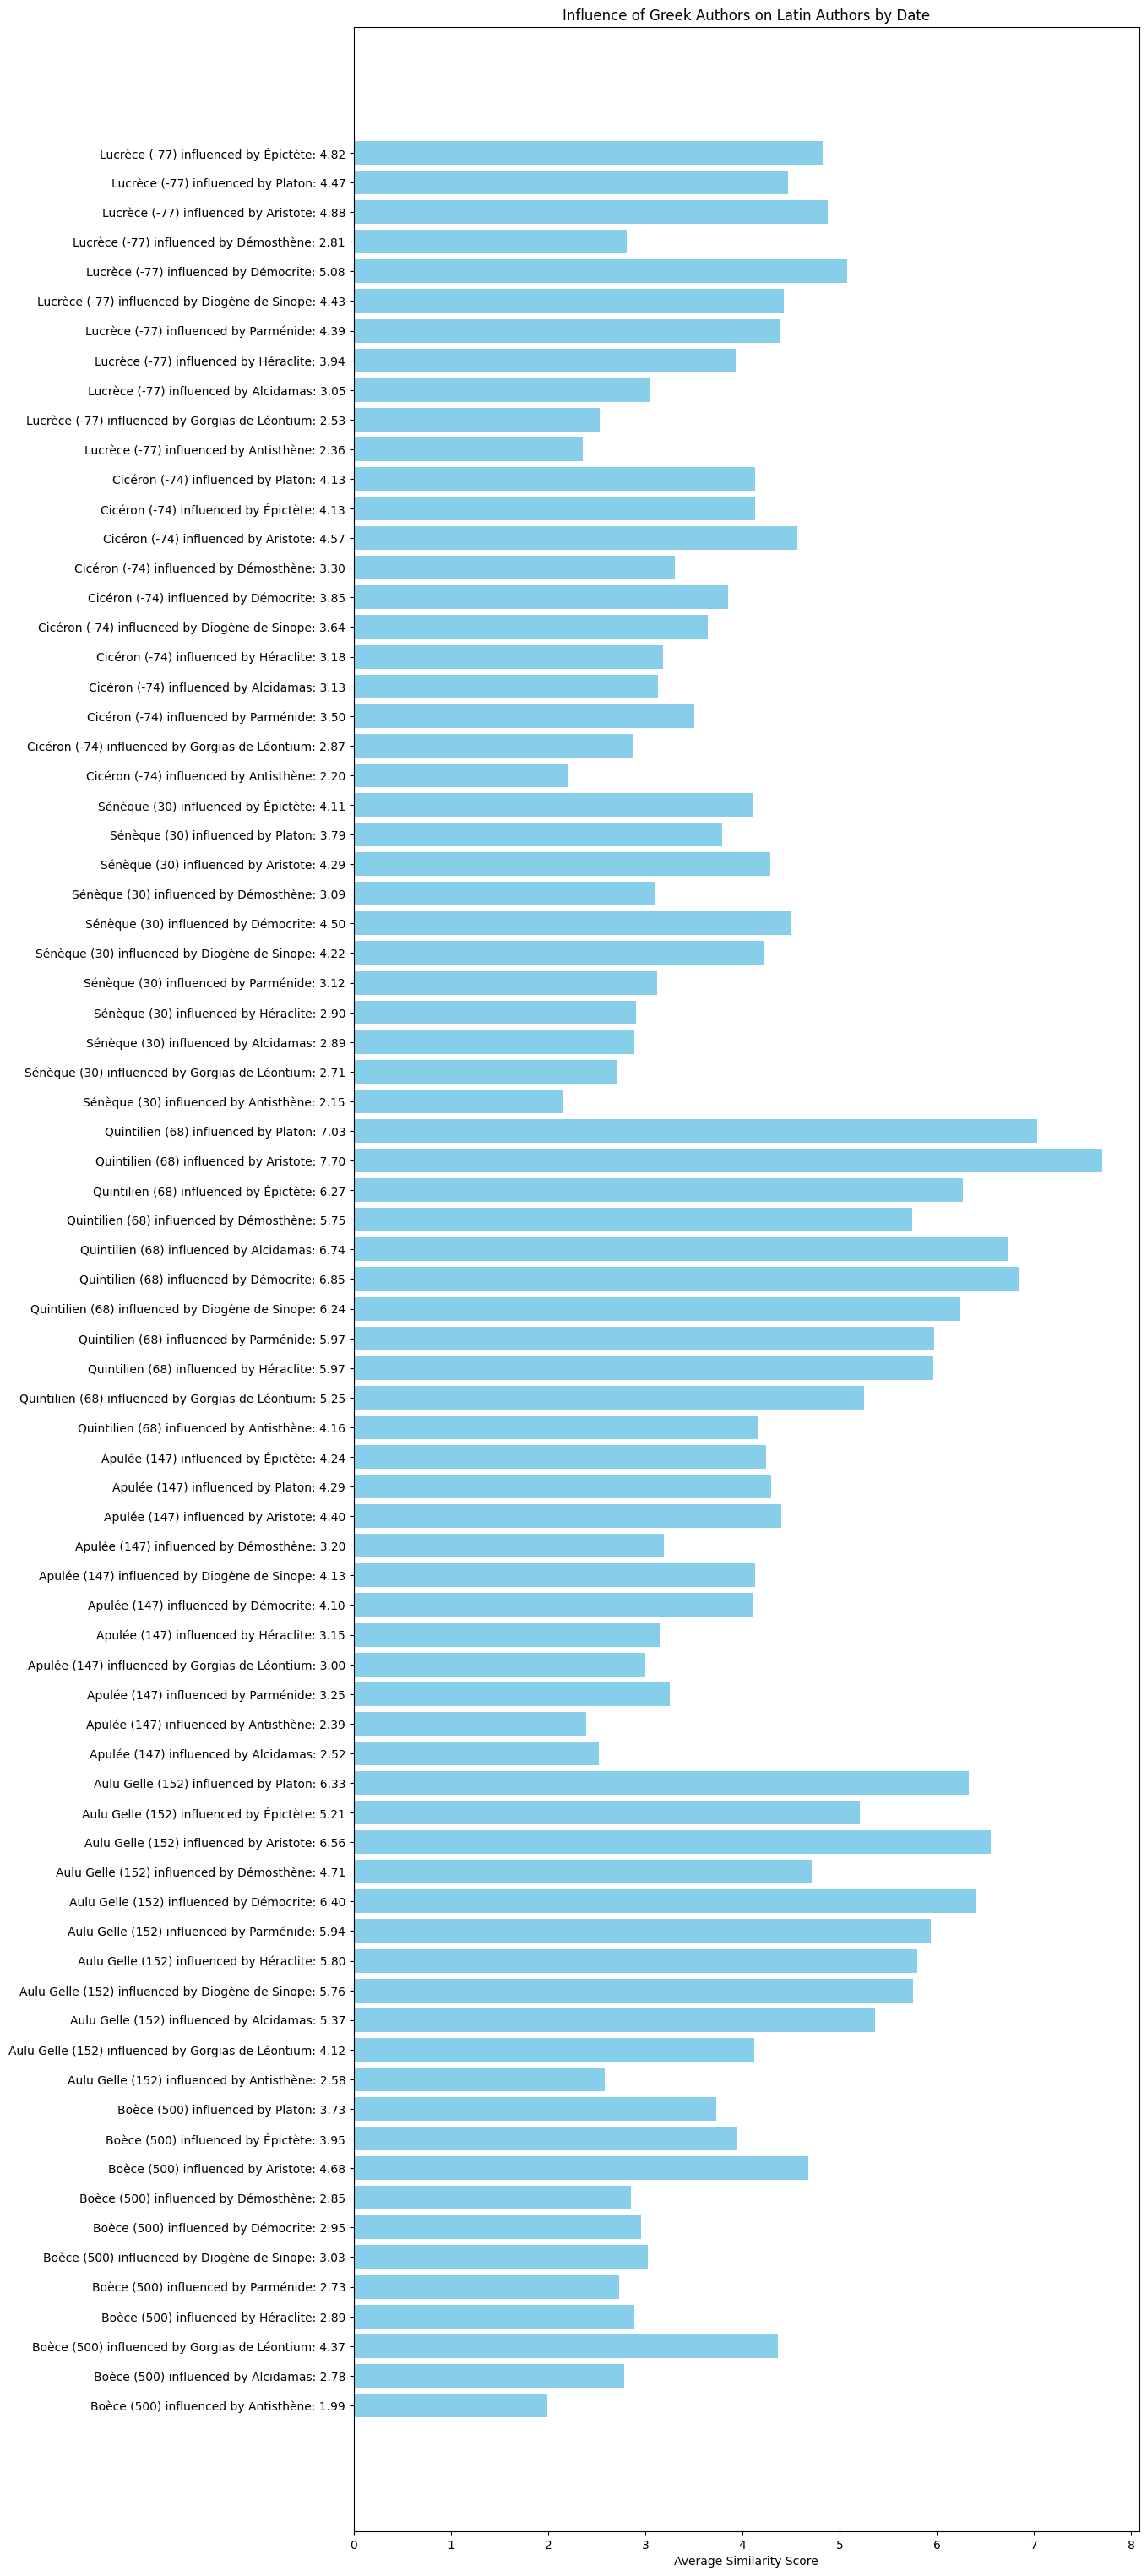

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, len(latin_results) * 0.5))
y_positions = range(len(latin_results))

# scores et labels
scores = [x[3] for x in latin_results]
labels = [f"{x[0]} ({x[1]:.0f}) influenced by {x[2]}: {x[3]:.2f}" for x in latin_results]

plt.barh(y_positions, scores, color='skyblue')
plt.yticks(y_positions, labels)
plt.xlabel('Average Similarity Score')
plt.title('Influence of Greek Authors on Latin Authors by Date')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Phrases en grec ancien et en latin
greek_sentence = '''νῦν, ἀρχῶν καταστάσεις πειρατέον ἀρχῆς διελθεῖν.'''
latin_sentence = '''diducuntur species; sequentia loco, prima parte tractanda sunt, ordiar.'''

# Obtention des embeddings pour chaque phrase
greek_embedding = model.encode(greek_sentence)
latin_embedding = model.encode(latin_sentence)
embedding_array = greek_embedding.cpu().numpy() if isinstance(greek_embedding, torch.Tensor) else greek_embedding
    # Imprimer une représentation simplifiée de l'embedding, comme la somme des valeurs
print(f"Résumé de l'embedding: Somme des valeurs = {np.sum(embedding_array)}")

# Fonction pour calculer la similarité cosinus
def cosine_similarity(a, b):
    a = torch.tensor(a)
    b = torch.tensor(b)
    return torch.nn.functional.cosine_similarity(a.unsqueeze(0), b.unsqueeze(0)).item()

# Calcul de la similarité entre les deux phrases
similarity_score = cosine_similarity(greek_embedding, latin_embedding)
print("Score de similarité :", similarity_score)

Résumé de l'embedding: Somme des valeurs = 7.1475934982299805
Score de similarité : 0.9162522554397583
